In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/titanic/train.csv")

In [3]:
df.info()
c = df.columns
for i in c:
    print(i,df[i].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
PassengerId [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 1

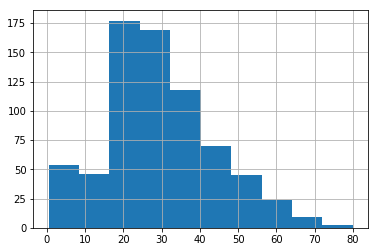

In [4]:
df.Age.hist()

In [5]:
ageAv = df.Age.mean()

In [6]:
df.Age = df.Age.fillna(ageAv)

In [7]:
df.drop(['Cabin'],axis = 1, inplace = True)

In [8]:
df = df.dropna()

In [9]:
df['Sex'] = (df['Sex']=='male').astype(np.int)

drop features that seem not usable

In [10]:
df = df.drop(['Name'],axis =1)

In [11]:
df = df.drop(['Ticket'],axis =1)

In [12]:
df = df.drop(['PassengerId'],axis=1)

'dummy' embarked feature

In [13]:
oh_ = pd.get_dummies(df['Embarked'])
df = df.join(oh_)
df = df.drop(['Embarked'],axis=1)

perform standardise

In [14]:
from sklearn.preprocessing import StandardScaler
df['AgeSD'] = StandardScaler().fit_transform(df.Age.values.reshape(-1,1))

In [15]:
df = df.drop(['Age'],axis=1)

perform train test split?

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=9999)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
K = 2
knn = KNeighborsClassifier(K)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [23]:
y_pred = knn.predict(X_train)

To visualize and calculate the  accuracy, confusion matrix, precision, recall

In [28]:
y_train.value_counts()

0    390
1    232
Name: Survived, dtype: int64

In [24]:
cm = confusion_matrix(y_pred,y_train)

[[390  80]
 [  0 152]]


<Figure size 720x720 with 0 Axes>

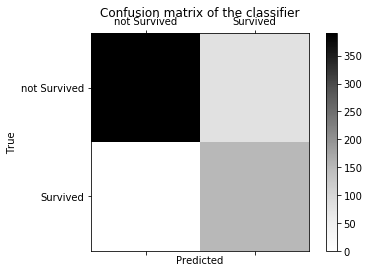

In [26]:
import HelpfulFunctions as hp
hp.print_cm(cm,['not Survived','Survived'],plt)

In [32]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       390
           1       1.00      0.66      0.79       232

   micro avg       0.87      0.87      0.87       622
   macro avg       0.91      0.83      0.85       622
weighted avg       0.89      0.87      0.86       622



In [37]:
print('accuracy:%.2f'%knn.score(X_train,y_train))

accuracy:0.87


out of sample analysis

In [39]:
y_test_pred = knn.predict(X_test)

[[146  60]
 [ 13  48]]


<Figure size 720x720 with 0 Axes>

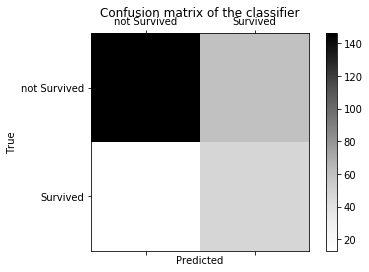

              precision    recall  f1-score   support

           0       0.71      0.92      0.80       159
           1       0.79      0.44      0.57       108

   micro avg       0.73      0.73      0.73       267
   macro avg       0.75      0.68      0.68       267
weighted avg       0.74      0.73      0.71       267

accuracy:1.00000


In [41]:
cm = confusion_matrix(y_test_pred,y_test)
hp.print_cm(cm,['not Survived','Survived'],plt)
print(classification_report(y_test,y_test_pred))
print('accuracy:%.5f'%knn.score(X_test,y_test_pred))

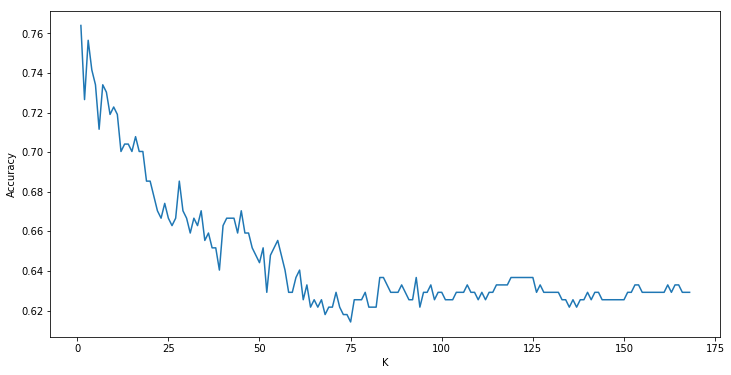

In [53]:
accs = []
ks = []

for k in range(1,169,1):
    knn1 = KNeighborsClassifier(n_neighbors = k, p=2)
    knn1.fit(X_train, y_train)
    y_pred = knn1.predict(X_train)
    y_pred_test = knn1.predict(X_test)
#     cm = confusion_matrix(y_test,y_pred_test)
    acc = knn1.score(X_test, y_test)
    ks.append(k)
    accs.append(acc)
plt.figure(figsize=(12, 6))
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(ks,accs)

seems that smaller k returns a better accuracy.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null int32
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
C           889 non-null uint8
Q           889 non-null uint8
S           889 non-null uint8
AgeSD       889 non-null float64
dtypes: float64(2), int32(1), int64(4), uint8(3)
memory usage: 94.7 KB


In [59]:
fea = []
for i in df.columns:
    fea.append(i)

In [60]:
fea.remove("Survived")

In [68]:
c = []
for i in fea:
    X = df.drop([i], axis=1)
    y = df['Survived']
    X = df.drop(['Survived'],axis=1)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=9999)
    knn2 = KNeighborsClassifier(n_neighbors = 1, p=2)
    knn2.fit(X_train,y_train)
    y_pred = knn2.predict(X_train)
    y_pred_test = knn2.predict(X_test)
    c.append(knn2.score(X_test,y_test))

In [69]:
accu = pd.DataFrame(c,index = fea,columns= ['Accuracy'])

In [70]:
accu

,Accuracy
Pclass,0.764045
Sex,0.764045
SibSp,0.764045
Parch,0.764045
Fare,0.764045
C,0.764045
Q,0.764045
S,0.764045
AgeSD,0.764045
